In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('./ENB2012_data.xlsx')
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area.1,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area.1,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Relative Compactness  768 non-null    float64
 1   Surface Area          768 non-null    float64
 2   Wall Area             768 non-null    float64
 3   Roof Area             768 non-null    float64
 4   Overall Height        768 non-null    float64
 5   Orientation           768 non-null    int64  
 6   Glazing Area          768 non-null    float64
 7   Glazing Area.1        768 non-null    int64  
 8   Heating Load          768 non-null    float64
 9   Cooling Load          768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Heating Load', ylabel='Count'>

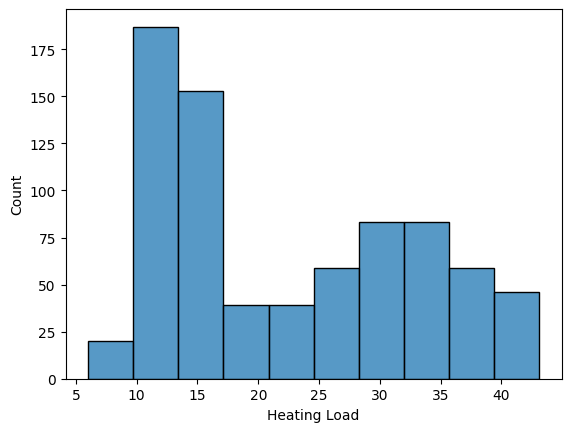

In [6]:
sns.histplot(df['Heating Load'], bins=10)

<Axes: xlabel='Cooling Load', ylabel='Count'>

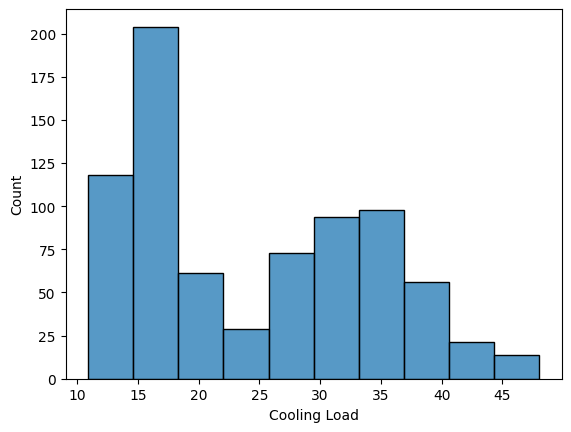

In [7]:
sns.histplot(df['Cooling Load'], bins=10)

<Axes: >

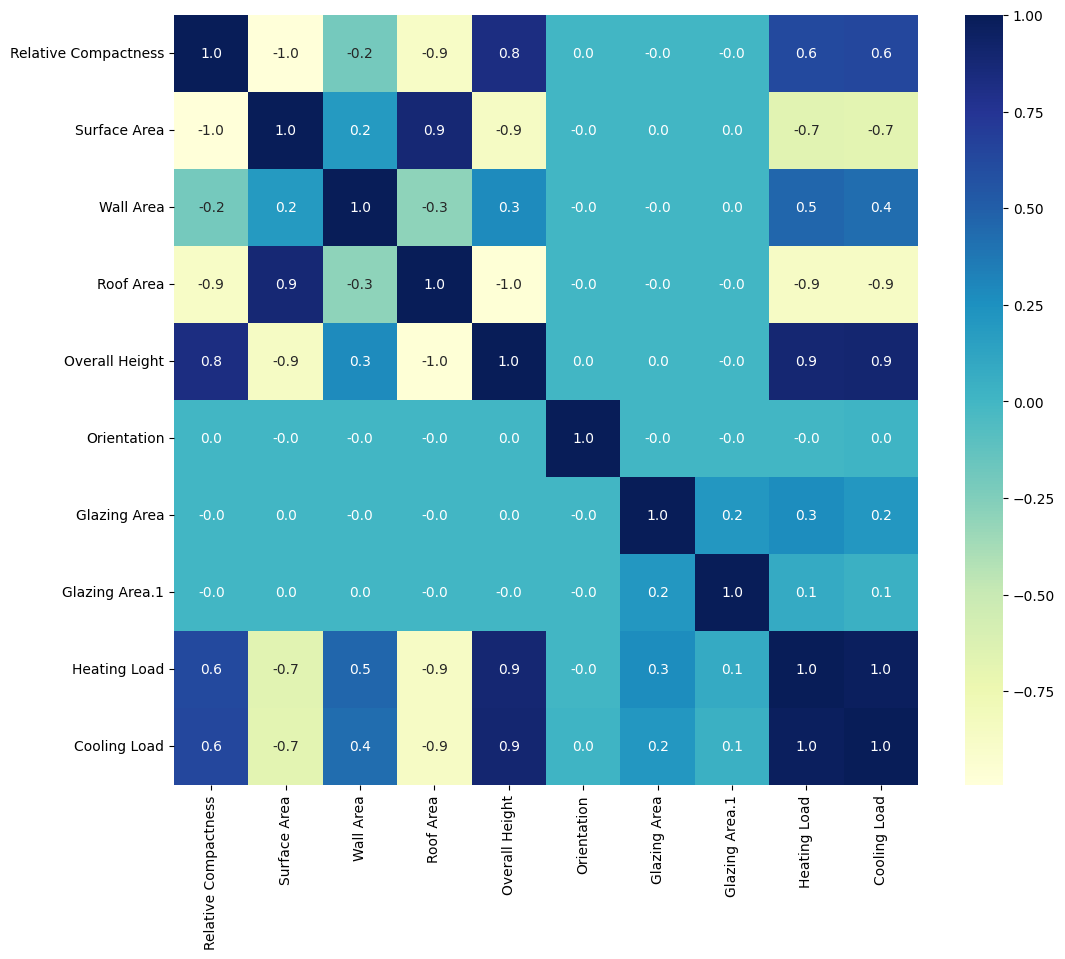

In [8]:
correlations = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlations, annot=True, fmt='.1f', cmap="YlGnBu")

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


In [10]:
X = df.drop(['Heating Load', 'Cooling Load'], axis=1)
y1 = df['Heating Load']
y2 = df['Cooling Load']

X_train, X_test, y_train, y_test_heat = train_test_split(X, y1, test_size=0.2, random_state=9)

Predict Heating Load

In [11]:
clf = GridSearchCV(GradientBoostingRegressor(),{
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}, cv=5)

clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.08375082, 0.10123019, 0.21072121, 0.05672994, 0.13250108,
        0.33230228, 0.0808876 , 0.13589449, 0.26458311, 0.04442048,
        0.08355613, 0.2534832 , 0.05825543, 0.14761567, 0.26934562,
        0.08422971, 0.12971058, 0.25657024, 0.04690375, 0.09396172,
        0.18568721, 0.05198336, 0.10518365, 0.19543085, 0.07611365,
        0.13413768, 0.2777317 ]),
 'std_fit_time': array([0.04932282, 0.023821  , 0.08562195, 0.00681664, 0.01157297,
        0.06631842, 0.00900639, 0.00950404, 0.01551261, 0.0069389 ,
        0.0137295 , 0.18787965, 0.00337666, 0.03051996, 0.07108194,
        0.02523593, 0.00862196, 0.01547983, 0.0082688 , 0.03254158,
        0.02764026, 0.00416972, 0.00787005, 0.0069937 , 0.01756035,
        0.00917818, 0.0184293 ]),
 'mean_score_time': array([0.00290875, 0.00271287, 0.00287242, 0.00179992, 0.00332165,
        0.00338492, 0.00279999, 0.00223742, 0.00507298, 0.00223103,
        0.00300603, 0.00259748, 0.00361595, 0.00259738, 0.003068

In [12]:
result = pd.DataFrame(clf.cv_results_)
result.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.195431,0.006994,0.002676,0.001106,0.2,5,200,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.998044,0.999005,0.998965,0.999231,0.998005,0.998650,0.000519,1
22,0.105184,0.007870,0.002343,0.000374,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.998330,0.998929,0.998951,0.999149,0.997881,0.998648,0.000472,2
14,0.269346,0.071082,0.003068,0.000537,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.997655,0.998854,0.998874,0.999166,0.998032,0.998516,0.000573,3
20,0.185687,0.027640,0.002307,0.000405,0.2,3,200,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.997993,0.998748,0.998543,0.998859,0.998058,0.998440,0.000354,4
21,0.051983,0.004170,0.001808,0.000403,0.2,5,50,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.997960,0.998608,0.998746,0.999083,0.997686,0.998416,0.000516,5
13,0.147616,0.030520,0.002597,0.000491,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.997542,0.998719,0.998455,0.998971,0.997848,0.998307,0.000534,6
19,0.093962,0.032542,0.002096,0.000681,0.2,3,100,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.997721,0.998475,0.998286,0.998645,0.998163,0.998258,0.000315,7
11,0.253483,0.187880,0.002597,0.000796,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.997703,0.998534,0.998276,0.998431,0.998271,0.998243,0.000287,8
25,0.134138,0.009178,0.002644,0.000563,0.2,7,100,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.997191,0.998547,0.998234,0.998586,0.997758,0.998063,0.000527,9
26,0.277732,0.018429,0.004417,0.000383,0.2,7,200,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.997094,0.998517,0.998157,0.998618,0.997755,0.998028,0.000557,10


In [13]:
clf.best_score_

0.9986498483556663

In [14]:
clf.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)

model_heat = model.fit(X_train, y_train)
y_pred_heat = model.predict(X_test)
print(mean_absolute_error(y_test_heat, y_pred_heat))
print(mean_squared_error(y_test_heat, y_pred_heat))

0.18944985736734973
0.08947626758668911


Predict Cooling Load

In [16]:
X_train, X_test, y_train, y_test_cool = train_test_split(X, y2, test_size=0.2, random_state=9)

In [17]:
clf = GridSearchCV(GradientBoostingRegressor(),{
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}, cv=5)

clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.04650068, 0.08735504, 0.26249871, 0.05022097, 0.10187688,
        0.23491402, 0.06158133, 0.12706532, 0.25888171, 0.03908687,
        0.08370638, 0.17575374, 0.04417515, 0.09443712, 0.21286459,
        0.05552778, 0.16754622, 0.27045274, 0.04299946, 0.07853107,
        0.17758007, 0.0538414 , 0.17163792, 0.24527898, 0.06010323,
        0.13008561, 0.29810658]),
 'std_fit_time': array([0.0130692 , 0.00987323, 0.06730401, 0.00279378, 0.00466789,
        0.03609553, 0.00485392, 0.01206828, 0.0407018 , 0.00187087,
        0.00257396, 0.02577621, 0.00139265, 0.01138765, 0.01649172,
        0.00191133, 0.0212972 , 0.01965229, 0.00524737, 0.00507422,
        0.01946131, 0.00479089, 0.10050394, 0.04452857, 0.00178839,
        0.01418486, 0.07060638]),
 'mean_score_time': array([0.00200233, 0.00321836, 0.00361128, 0.00200572, 0.00231957,
        0.0039567 , 0.00240431, 0.00337977, 0.00480914, 0.00220242,
        0.00242534, 0.00250769, 0.00225744, 0.00239878, 0.002614

In [18]:
clf.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}

In [19]:
clf.best_score_

0.9871136121013151

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)

model.fit(X_train, y_train)
y_pred_cool = model.predict(X_test)
print(mean_absolute_error(y_test_cool, y_pred_cool))
print(mean_squared_error(y_test_cool, y_pred_cool))

0.6382499804149755
1.1762203952077028


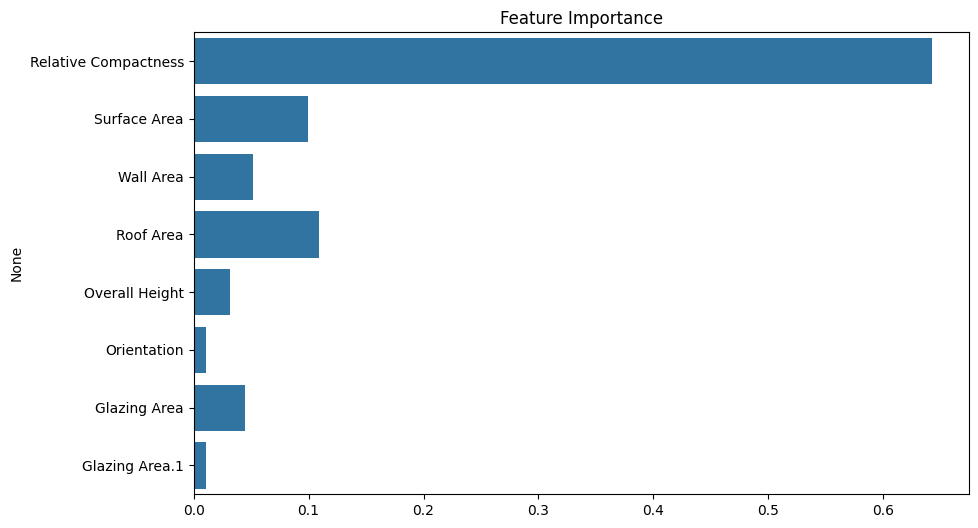

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.show()

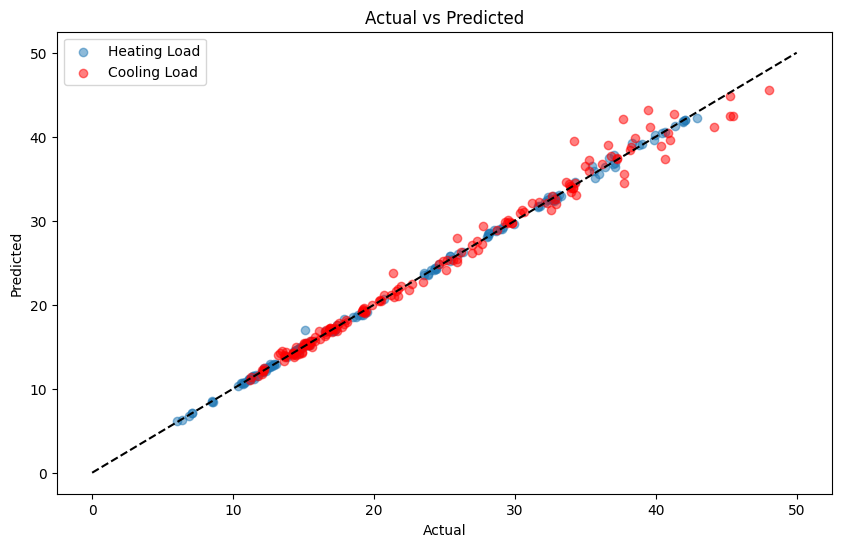

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_heat, y_pred_heat, alpha=0.5, label='Heating Load')
plt.scatter(y_test_cool, y_pred_cool, alpha=0.5, label='Cooling Load', color='r')
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In [24]:
y_test_heat.shape


(154,)

In [25]:
y_pred_heat.shape

(154,)